In [14]:
!pip install svgutils

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple


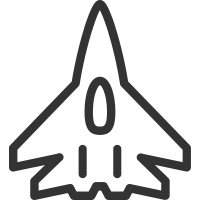

In [15]:
from IPython.display import SVG, display

svg_file = 'assets/rotate/plane.svg'

display(SVG(filename=svg_file))

In [16]:
import xml.etree.ElementTree as ET
import os

def rotate_svg(input_path, output_path, angle):
    """
    将SVG文件顺时针旋转指定角度并保存到新文件，以画布中心为旋转点
    
    参数:
        input_path (str): 输入SVG文件路径
        output_path (str): 输出SVG文件路径
        angle (float): 旋转角度（度）
    """
    try:
        # 解析SVG文件
        tree = ET.parse(input_path)
        root = tree.getroot()
        
        # 获取SVG命名空间
        namespace = {"svg": "http://www.w3.org/2000/svg"}
        
        # 找到svg根元素
        svg_element = root.find(".", namespaces=namespace)
        if svg_element is None:
            raise ValueError("找不到SVG根元素")
        
        # 提取宽度和高度信息，优先使用viewBox
        width, height = None, None
        viewBox = svg_element.get("viewBox")
        
        if viewBox:
            # viewBox格式: x y width height
            try:
                vb_x, vb_y, vb_width, vb_height = map(float, viewBox.split())
                width = vb_width
                height = vb_height
            except (ValueError, TypeError):
                raise ValueError("viewBox格式无效")
        else:
            # 从width和height属性获取尺寸
            width_attr = svg_element.get("width")
            height_attr = svg_element.get("height")
            
            if not width_attr or not height_attr:
                raise ValueError("SVG缺少尺寸信息（width/height或viewBox）")
            
            # 移除可能的单位并转换为数字
            try:
                width = float(width_attr.replace("px", "")) if "px" in width_attr else float(width_attr)
                height = float(height_attr.replace("px", "")) if "px" in height_attr else float(height_attr)
            except ValueError:
                raise ValueError("无法解析SVG尺寸为数字")
        
        # 计算画布中心点（确保是画布的几何中心）
        center_x = width / 2
        center_y = height / 2
        
        # 顺时针旋转相当于应用负角度的旋转变换
        rotation = f"rotate({-angle} {center_x} {center_y})"
        
        # 获取现有的变换属性
        existing_transform = svg_element.get("transform", "")
        
        # 组合变换：先应用已有变换，再应用旋转变换
        if existing_transform:
            new_transform = f"{existing_transform} {rotation}"
        else:
            new_transform = rotation
        
        # 更新transform属性
        svg_element.set("transform", new_transform)
        
        # 保存修改后的SVG
        # 注册命名空间以确保正确输出
        ET.register_namespace("", "http://www.w3.org/2000/svg")
        tree.write(output_path, encoding="utf-8", xml_declaration=True)
        print(f"成功将SVG旋转{angle}度并保存至: {output_path}")
        
    except Exception as e:
        print(f"处理SVG时出错: {str(e)}")


In [17]:
from pathlib import Path

# 示例用法
input_file = "assets/rotate/plane.svg"       # 输入SVG文件路径

rotation_angle = 30            # 旋转角度（度）

output_file = f"rotated_{rotation_angle}.svg"    # 输出SVG文件路径

output_path = Path(input_file).parent / "test.svg"

# 检查输入文件是否存在
if not os.path.exists(input_file):
    print(f"错误: 输入文件 '{input_file}' 不存在")

# 执行旋转操作
rotate_svg(input_file, output_path, rotation_angle)

成功将SVG旋转30度并保存至: assets\rotate\test.svg


In [18]:
# 从0到360度，每隔10度生成一个旋转后的SVG
for angle in range(0, 360, 10):
    output_file = f"rotated_{angle}.svg"  # 输出文件名
    output_path = Path(input_file).parent / output_file  # 输出完整路径

    # 执行旋转操作
    rotate_svg(input_file, output_path, angle)
    print(f"已生成旋转{angle}度的SVG文件: {output_path}")

成功将SVG旋转0度并保存至: assets\rotate\rotated_0.svg
已生成旋转0度的SVG文件: assets\rotate\rotated_0.svg
成功将SVG旋转10度并保存至: assets\rotate\rotated_10.svg
已生成旋转10度的SVG文件: assets\rotate\rotated_10.svg
成功将SVG旋转20度并保存至: assets\rotate\rotated_20.svg
已生成旋转20度的SVG文件: assets\rotate\rotated_20.svg
成功将SVG旋转30度并保存至: assets\rotate\rotated_30.svg
已生成旋转30度的SVG文件: assets\rotate\rotated_30.svg
成功将SVG旋转40度并保存至: assets\rotate\rotated_40.svg
已生成旋转40度的SVG文件: assets\rotate\rotated_40.svg
成功将SVG旋转50度并保存至: assets\rotate\rotated_50.svg
已生成旋转50度的SVG文件: assets\rotate\rotated_50.svg
成功将SVG旋转60度并保存至: assets\rotate\rotated_60.svg
已生成旋转60度的SVG文件: assets\rotate\rotated_60.svg
成功将SVG旋转70度并保存至: assets\rotate\rotated_70.svg
已生成旋转70度的SVG文件: assets\rotate\rotated_70.svg
成功将SVG旋转80度并保存至: assets\rotate\rotated_80.svg
已生成旋转80度的SVG文件: assets\rotate\rotated_80.svg
成功将SVG旋转90度并保存至: assets\rotate\rotated_90.svg
已生成旋转90度的SVG文件: assets\rotate\rotated_90.svg
成功将SVG旋转100度并保存至: assets\rotate\rotated_100.svg
已生成旋转100度的SVG文件: assets\rotate\rotated_100.svg

In [19]:
import xml.etree.ElementTree as ET
import re

def parse_length(value):
    """解析带单位的长度值，返回数值部分"""
    if not value:
        return 0.0
    # 移除所有非数字字符（保留小数点和负号）
    num_str = re.sub(r'[^\d.-]', '', value)
    return float(num_str) if num_str else 0.0

def get_element_bounds(element, namespace):
    """获取单个元素的边界框"""
    # 处理基本形状
    if element.tag.endswith('rect'):
        x = parse_length(element.get('x', 0))
        y = parse_length(element.get('y', 0))
        width = parse_length(element.get('width', 0))
        height = parse_length(element.get('height', 0))
        return (x, y, x + width, y + height)
    
    elif element.tag.endswith('circle'):
        cx = parse_length(element.get('cx', 0))
        cy = parse_length(element.get('cy', 0))
        r = parse_length(element.get('r', 0))
        return (cx - r, cy - r, cx + r, cy + r)
    
    elif element.tag.endswith('ellipse'):
        cx = parse_length(element.get('cx', 0))
        cy = parse_length(element.get('cy', 0))
        rx = parse_length(element.get('rx', 0))
        ry = parse_length(element.get('ry', 0))
        return (cx - rx, cy - ry, cx + rx, cy + ry)
    
    elif element.tag.endswith('line'):
        x1 = parse_length(element.get('x1', 0))
        y1 = parse_length(element.get('y1', 0))
        x2 = parse_length(element.get('x2', 0))
        y2 = parse_length(element.get('y2', 0))
        return (min(x1, x2), min(y1, y2), max(x1, x2), max(y1, y2))
    
    elif element.tag.endswith('polygon') or element.tag.endswith('polyline'):
        points = element.get('points', '')
        if not points:
            return (0, 0, 0, 0)
        
        coords = []
        for point in points.split():
            x, y = point.split(',')
            coords.append((parse_length(x), parse_length(y)))
        
        if not coords:
            return (0, 0, 0, 0)
            
        min_x = min(p[0] for p in coords)
        min_y = min(p[1] for p in coords)
        max_x = max(p[0] for p in coords)
        max_y = max(p[1] for p in coords)
        return (min_x, min_y, max_x, max_y)
    
    # 对于文本和路径等复杂元素，这里简化处理
    return (0, 0, 0, 0)

def get_geometric_bounds(svg_element, namespace):
    """计算整个SVG图形的边界框"""
    min_x, min_y = float('inf'), float('inf')
    max_x, max_y = float('-inf'), float('-inf')
    
    # 遍历所有子元素
    for element in svg_element.findall('.//*', namespaces=namespace):
        x1, y1, x2, y2 = get_element_bounds(element, namespace)
        
        if x1 < min_x:
            min_x = x1
        if y1 < min_y:
            min_y = y1
        if x2 > max_x:
            max_x = x2
        if y2 > max_y:
            max_y = y2
    
    # 如果没有找到任何元素，使用画布尺寸
    if min_x == float('inf'):
        width = parse_length(svg_element.get('width', 0))
        height = parse_length(svg_element.get('height', 0))
        return (0, 0, width, height)
    
    return (min_x, min_y, max_x, max_y)

def add_background(svg_element, namespace, color="#ffffff"):
    """为SVG添加背景色"""
    # 获取SVG的宽度和高度
    width = parse_length(svg_element.get('width', 0))
    height = parse_length(svg_element.get('height', 0))
    
    # 如果无法获取宽度和高度，使用几何边界
    if width <= 0 or height <= 0:
        min_x, min_y, max_x, max_y = get_geometric_bounds(svg_element, namespace)
        width = max_x - min_x
        height = max_y - min_y
    
    # 创建背景矩形元素
    rect = ET.Element("{http://www.w3.org/2000/svg}rect")
    rect.set("x", "0")
    rect.set("y", "0")
    rect.set("width", str(width))
    rect.set("height", str(height))
    rect.set("fill", color)
    
    # 将背景矩形添加为第一个子元素（确保在最底层）
    if len(svg_element) > 0:
        svg_element.insert(0, rect)
    else:
        svg_element.append(rect)
    
    return svg_element

def rotate_svg_around_center(input_path, output_path, angle, background_color="#f0f0f0", rotate_around_dimensions=True):
    """
    将SVG文件中的图形旋转指定角度并保存，同时添加底色
    
    参数:
        input_path (str): 输入SVG文件路径
        output_path (str): 输出SVG文件路径
        angle (float): 旋转角度（度）
        background_color (str): 背景颜色，默认为浅灰色#f0f0f0
        rotate_around_dimensions (bool): 是否以SVG尺寸为中心旋转，True为以尺寸为中心，False为以图形几何中心
    """
    try:
        # 解析SVG文件
        tree = ET.parse(input_path)
        root = tree.getroot()
        
        # 获取SVG命名空间
        namespace = {"svg": "http://www.w3.org/2000/svg"}
        
        # 找到svg根元素
        svg_element = root.find(".", namespaces=namespace)
        if svg_element is None:
            raise ValueError("找不到SVG根元素")
        
        # 获取SVG的宽度和高度
        width = parse_length(svg_element.get('width', 0))
        height = parse_length(svg_element.get('height', 0))
        
        if width <= 0 or height <= 0:
            # 如果无法获取宽度和高度，使用几何边界
            min_x, min_y, max_x, max_y = get_geometric_bounds(svg_element, namespace)
            width = max_x - min_x
            height = max_y - min_y
            # 更新SVG元素的宽高属性
            svg_element.set('width', str(width))
            svg_element.set('height', str(height))
        
        # 确定旋转中心
        if rotate_around_dimensions:
            # 以SVG尺寸为中心
            center_x = width / 2
            center_y = height / 2
            print(f"SVG尺寸中心: ({center_x}, {center_y}) (宽: {width}, 高: {height})")
        else:
            # 以图形几何中心
            min_x, min_y, max_x, max_y = get_geometric_bounds(svg_element, namespace)
            center_x = (min_x + max_x) / 2
            center_y = (min_y + max_y) / 2
            print(f"图形几何中心: ({center_x}, {center_y})")
        
        # 顺时针旋转相当于应用负角度的旋转变换
        rotation = f"rotate({-angle} {center_x} {center_y})"
        
        # 获取现有的变换属性
        existing_transform = svg_element.get("transform", "")
        
        # 组合变换：先应用已有变换，再应用旋转变换
        if existing_transform:
            new_transform = f"{existing_transform} {rotation}"
        else:
            new_transform = rotation
        
        # 更新transform属性
        svg_element.set("transform", new_transform)
        
        # 添加背景色
        svg_element = add_background(svg_element, namespace, background_color)
        
        # 保存修改后的SVG
        # 注册命名空间以确保正确输出
        ET.register_namespace("", "http://www.w3.org/2000/svg")
        tree.write(output_path, encoding="utf-8", xml_declaration=True)
        print(f"成功将SVG旋转{angle}度并添加背景色，保存至: {output_path}")
        
    except Exception as e:
        print(f"处理SVG时出错: {str(e)}")


In [20]:
# 从0到360度，每隔10度生成一个旋转后的SVG
for angle in range(0, 360, 15):
    output_file = f"rotated_{angle}.svg"  # 输出文件名
    output_path = Path(input_file).parent / output_file  # 输出完整路径

    # 执行旋转操作
    rotate_svg_around_center(input_file, output_path, angle)
    print(f"已生成旋转{angle}度的SVG文件: {output_path}")

SVG尺寸中心: (100.0, 100.0) (宽: 200.0, 高: 200.0)
成功将SVG旋转0度并添加背景色，保存至: assets\rotate\rotated_0.svg
已生成旋转0度的SVG文件: assets\rotate\rotated_0.svg
SVG尺寸中心: (100.0, 100.0) (宽: 200.0, 高: 200.0)
成功将SVG旋转15度并添加背景色，保存至: assets\rotate\rotated_15.svg
已生成旋转15度的SVG文件: assets\rotate\rotated_15.svg
SVG尺寸中心: (100.0, 100.0) (宽: 200.0, 高: 200.0)
成功将SVG旋转30度并添加背景色，保存至: assets\rotate\rotated_30.svg
已生成旋转30度的SVG文件: assets\rotate\rotated_30.svg
SVG尺寸中心: (100.0, 100.0) (宽: 200.0, 高: 200.0)
成功将SVG旋转45度并添加背景色，保存至: assets\rotate\rotated_45.svg
已生成旋转45度的SVG文件: assets\rotate\rotated_45.svg
SVG尺寸中心: (100.0, 100.0) (宽: 200.0, 高: 200.0)
成功将SVG旋转60度并添加背景色，保存至: assets\rotate\rotated_60.svg
已生成旋转60度的SVG文件: assets\rotate\rotated_60.svg
SVG尺寸中心: (100.0, 100.0) (宽: 200.0, 高: 200.0)
成功将SVG旋转75度并添加背景色，保存至: assets\rotate\rotated_75.svg
已生成旋转75度的SVG文件: assets\rotate\rotated_75.svg
SVG尺寸中心: (100.0, 100.0) (宽: 200.0, 高: 200.0)
成功将SVG旋转90度并添加背景色，保存至: assets\rotate\rotated_90.svg
已生成旋转90度的SVG文件: assets\rotate\rotated_90.svg
SVG尺寸中心: (

In [ ]:
import svgpathtools

# 读取原始 SVG
svg = svgpathtools.parse_svg("original.svg")

# 应用 45 度旋转
svg.transform(svgpathtools.Transform().rotate(45))

# 计算并更新视口
new_viewBox = svgpathtools.calculate_bbox(svg.d)
svg.viewbox = new_viewBox

# 保存修改后的 SVG
svg.save("rotated.svg")

共找到 50 个SVG文件:

显示文件: plane.svg


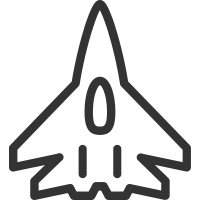


显示文件: rotated_0.svg


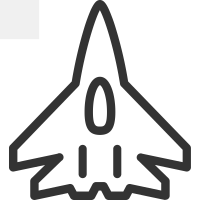


显示文件: rotated_10.svg


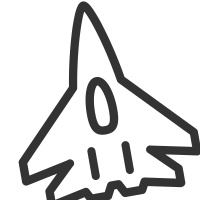


显示文件: rotated_100.svg


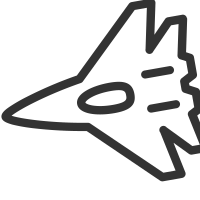


显示文件: rotated_105.svg


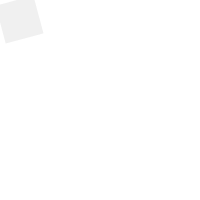


显示文件: rotated_110.svg


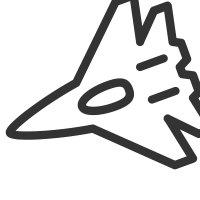


显示文件: rotated_120.svg


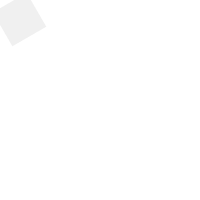


显示文件: rotated_130.svg


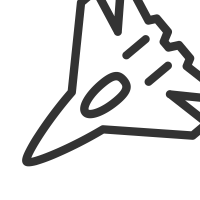


显示文件: rotated_135.svg


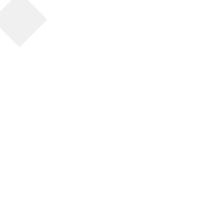


显示文件: rotated_140.svg


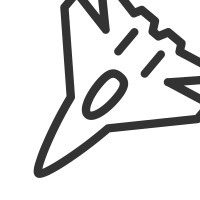


显示文件: rotated_15.svg


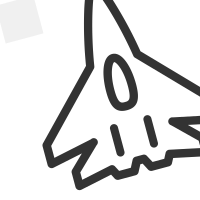


显示文件: rotated_150.svg


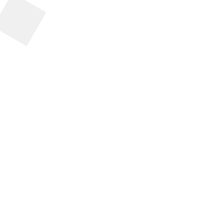


显示文件: rotated_160.svg


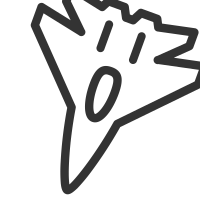


显示文件: rotated_165.svg


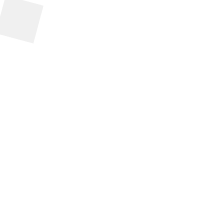


显示文件: rotated_170.svg


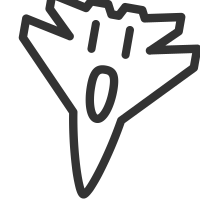


显示文件: rotated_180.svg


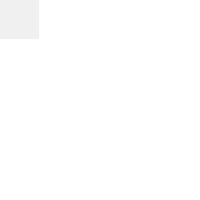


显示文件: rotated_190.svg


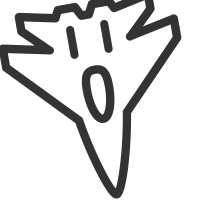


显示文件: rotated_195.svg


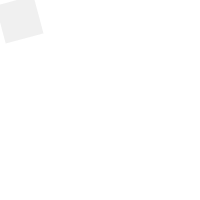


显示文件: rotated_20.svg


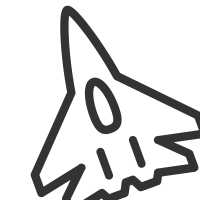


显示文件: rotated_200.svg


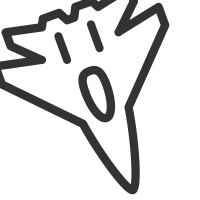


显示文件: rotated_210.svg


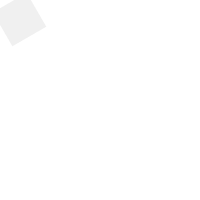


显示文件: rotated_220.svg


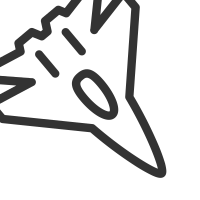


显示文件: rotated_225.svg


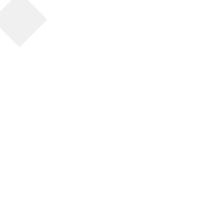


显示文件: rotated_230.svg


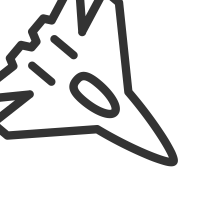


显示文件: rotated_240.svg


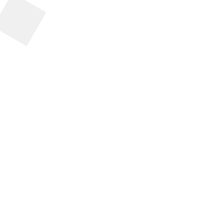


显示文件: rotated_250.svg


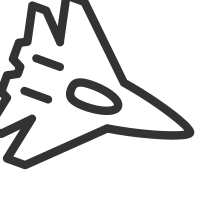


显示文件: rotated_255.svg


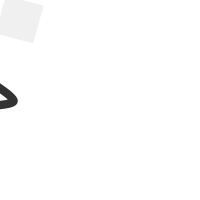


显示文件: rotated_260.svg


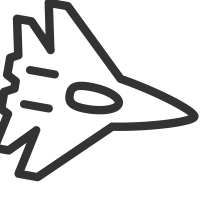


显示文件: rotated_270.svg


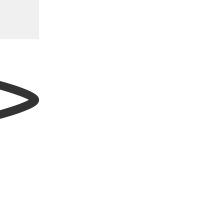


显示文件: rotated_280.svg


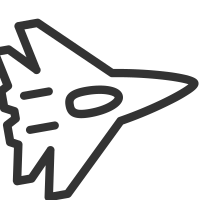


显示文件: rotated_285.svg


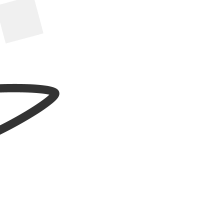


显示文件: rotated_290.svg


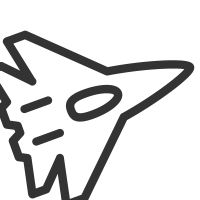


显示文件: rotated_30.svg


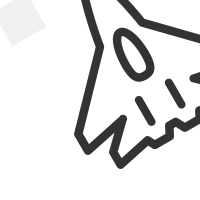


显示文件: rotated_300.svg


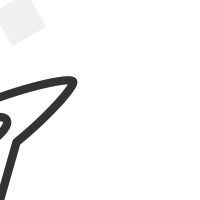


显示文件: rotated_310.svg


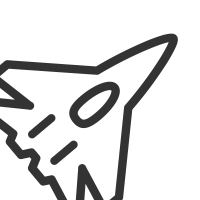


显示文件: rotated_315.svg


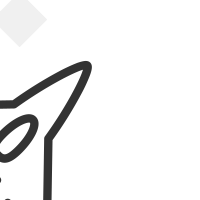


显示文件: rotated_320.svg


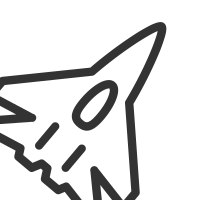


显示文件: rotated_330.svg


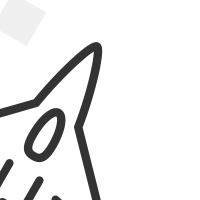


显示文件: rotated_340.svg


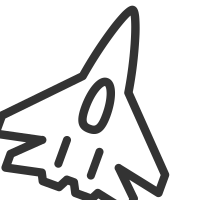


显示文件: rotated_345.svg


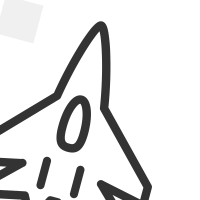


显示文件: rotated_350.svg


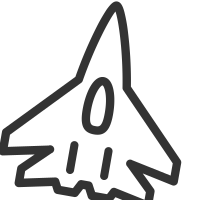


显示文件: rotated_40.svg


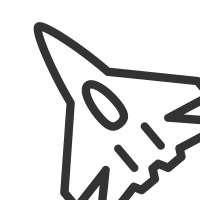


显示文件: rotated_45.svg


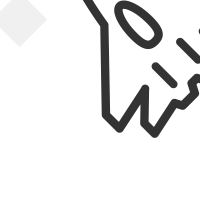


显示文件: rotated_50.svg


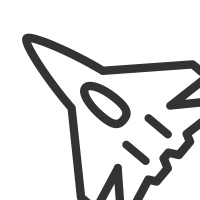


显示文件: rotated_60.svg


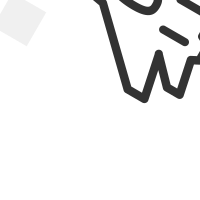


显示文件: rotated_70.svg


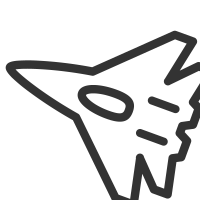


显示文件: rotated_75.svg


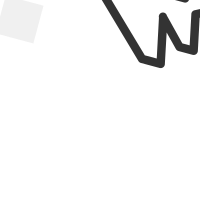


显示文件: rotated_80.svg


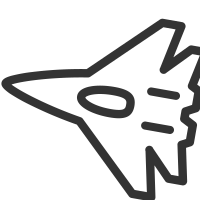


显示文件: rotated_90.svg


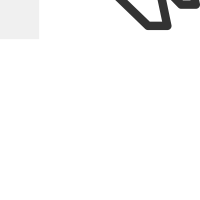


显示文件: test.svg


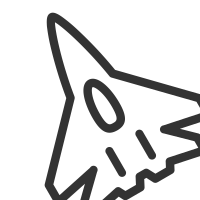

In [21]:
from IPython.display import SVG, display
from pathlib import Path

# 设置SVG文件目录
svg_dir = Path("assets/rotate")

# 获取目录中所有SVG文件
svg_files = list(svg_dir.glob("*.svg"))

if not svg_files:
    print("没有找到SVG文件")
else:
    print(f"共找到 {len(svg_files)} 个SVG文件:")
    
    # 显示每个SVG文件
    for svg_file in svg_files:
        print(f"\n显示文件: {svg_file.name}")
        display(SVG(filename=str(svg_file)))